<a href="https://colab.research.google.com/github/UmutErayAltay/Ev_Fiyat_Tahmin/blob/main/Makine_%C3%96%C4%9Frenimi.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [49]:
!pip install eli5

     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 216.2/216.2 kB 3.3 MB/s eta 0:00:00
  Preparing metadata (setup.py) ... done
  Created wheel for eli5: filename=eli5-0.13.0-py2.py3-none-any.whl size=107719 sha256=62edc70245646a1d8892b1154ffb23f6172097237946c68cbe712af2b1c07949
  Stored in directory: /root/.cache/pip/wheels/b8/58/ef/2cf4c306898c2338d51540e0922c8e0d6028e07007085c0004
Successfully built eli5


In [50]:
import eli5

In [59]:
import pandas as pd
import numpy as np

from sklearn.model_selection import train_test_split
from sklearn.metrics import mean_absolute_error
from sklearn.metrics import r2_score

from sklearn.preprocessing import LabelEncoder
from sklearn.ensemble import GradientBoostingRegressor
from sklearn.ensemble import VotingRegressor
from sklearn.ensemble import RandomForestRegressor
from sklearn.linear_model import LinearRegression

In [2]:
veri = pd.read_csv("ev_verileri.csv")
veri = veri.drop(['İlan Numarası', 'İlan Güncelleme Tarihi','Takas','Kira Getirisi', ' İlan Oluşturma Tarihi', 'WC Metrekare','Aidat','Kullanım Durumu','Balkon Metrekare',
'Balkon Durumu', 'Balkon Tipi', 'Görüntülü Gezilebilir Mi?', 'WC Sayısı', 'Kategorisi','Banyo Metrekare', 'Yatırıma Uygunluk','Balkon Sayısı', 'Yapı Tipi','Türü', 'İpotek Durumu'], axis=1)
veri.columns

Index(['Net Metrekare', 'Oda Sayısı', 'Bulunduğu Kat', 'Isıtma Tipi',
       'Krediye Uygunluk', 'Yapı Durumu', 'Site İçerisinde', 'Banyo Sayısı',
       'Fiyat Durumu', 'Tipi', 'Brüt Metrekare', 'Binanın Yaşı',
       'Binanın Kat Sayısı', 'Tapu Durumu', 'Eşya Durumu', 'Konum', 'Fiyat'],
      dtype='object')

In [39]:
veri

,Net Metrekare,Oda Sayısı,Bulunduğu Kat,Isıtma Tipi,Krediye Uygunluk,Yapı Durumu,Site İçerisinde,Banyo Sayısı,Fiyat Durumu,Tipi,Brüt Metrekare,Binanın Yaşı,Binanın Kat Sayısı,Tapu Durumu,Eşya Durumu,Konum,Fiyat
0,80,2,6,6,1,0,1,2,3,0,85,0,7,3,0,11,3500000
1,110,6,1,4,1,2,0,1,3,0,130,2,5,1,0,4,3000000
2,110,6,1,4,1,2,0,1,3,0,130,2,5,1,0,4,3000000
3,110,2,3,4,1,2,1,1,3,0,120,5,5,4,0,9,2199000
4,130,10,3,4,1,2,1,2,3,0,150,5,3,4,0,11,2500000
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
1169,40,15,1,4,1,2,1,1,3,0,45,0,3,4,0,12,1150000
1170,120,6,3,4,1,2,1,1,3,0,132,3,5,4,1,4,3900000
1171,120,6,0,4,1,2,1,1,3,0,140,5,5,1,0,11,1575000
1172,140,6,6,4,1,2,0,2,2,0,150,5,6,3,0,6,3715000


In [18]:
veri["Yapı Durumu"].fillna("İkinci El", inplace=True)
veri["Eşya Durumu"].fillna("Boş", inplace=True)
veri['Tapu Durumu'].fillna("Bilinmiyor", inplace=True)

In [5]:
for index, değişken in enumerate(veri['Fiyat']):
    if veri['Fiyat'][index] >= 5000000:
        veri = veri.drop(index, axis=0)
veri = veri.reset_index(level=0, drop=True)

In [ ]:
for index, değişken in enumerate(veri['Net Metrekare']):
    veri['Net Metrekare'][index] = veri['Net Metrekare'][index].replace("M2"," ")
    veri['Net Metrekare'][index] = veri['Net Metrekare'][index].replace(" ","")
    veri['Net Metrekare'][index] = veri['Net Metrekare'][index].replace(".","")
    veri['Net Metrekare'][index] = int(veri['Net Metrekare'][index])
    if veri['Net Metrekare'][index] >= 250:
        veri = veri.drop(index, axis=0)
veri = veri.reset_index(level=0, drop=True)

In [7]:
veri['Net Metrekare'].unique()

array([80, 110, 130, 120, 85, 90, 95, 70, 98, 100, 145, 50, 79, 125, 140,
       135, 115, 160, 60, 150, 105, 108, 148, 200, 170, 151, 220, 75, 55,
       128, 165, 117, 86, 137, 45, 185, 40, 240, 132, 87, 49, 109, 143,
       84, 72, 68, 147, 138, 175, 116, 139, 65, 180, 83, 122, 82, 119,
       174, 230, 235, 66, 57, 41, 107, 102, 225, 35, 142, 136, 129, 205,
       97, 149, 96, 99, 76, 156, 81, 118, 210, 112, 133, 126, 111, 106,
       58, 53, 54, 190, 121, 62, 113, 157, 52, 47, 11, 78, 131, 153, 141,
       89, 77, 124, 127, 20, 189, 94, 123, 198, 245, 188, 42, 169, 92],
      dtype=object)

In [ ]:
for index, değişken in enumerate(veri['Brüt Metrekare']):
    veri['Brüt Metrekare'][index] = veri['Brüt Metrekare'][index].replace("M2"," ")
    veri['Brüt Metrekare'][index] = veri['Brüt Metrekare'][index].replace(" ","")
    veri['Brüt Metrekare'][index] = veri['Brüt Metrekare'][index].replace(".","")
    veri['Brüt Metrekare'][index] = int(veri['Brüt Metrekare'][index])
veri = veri.reset_index(level=0, drop=True)

In [9]:
veri['Brüt Metrekare'].unique()

array([85, 130, 120, 150, 135, 95, 110, 105, 71, 115, 192, 60, 80, 140,
       100, 55, 160, 155, 125, 126, 81, 175, 165, 65, 70, 236, 145, 128,
       200, 230, 90, 195, 208, 240, 142, 190, 143, 88, 170, 220, 50, 225,
       45, 260, 92, 138, 133, 156, 86, 78, 388, 99, 196, 283, 75, 63, 250,
       148, 118, 117, 127, 209, 98, 180, 235, 207, 273, 141, 139, 210,
       111, 97, 168, 68, 157, 146, 1346, 158, 187, 132, 121, 40, 162, 185,
       164, 167, 288, 584, 96, 166, 58, 77, 67, 286, 232, 169, 84, 202,
       134, 224, 62, 129, 300, 280, 245, 172, 104, 147, 108, 603, 136,
       154, 189, 89, 79, 12, 183, 193, 103, 93, 184, 106, 151, 205, 194,
       82, 112, 177, 21, 102, 48, 113, 144, 122, 256, 10892, 10898, 149,
       242, 137, 186, 700, 91], dtype=object)

In [10]:
veri = veri.dropna(subset=['Bulunduğu Kat'])
veri = veri.reset_index(level=0, drop=True)

In [ ]:
for index, değişken in enumerate(veri['Bulunduğu Kat']):
    veri['Bulunduğu Kat'][index] = veri['Bulunduğu Kat'][index].replace(".Kat","")
    veri['Bulunduğu Kat'][index] = veri['Bulunduğu Kat'][index].replace('Bodrum Kat',"-1")
    veri['Bulunduğu Kat'][index] = veri['Bulunduğu Kat'][index].replace("Kot 1 (-1)","-1")
    veri['Bulunduğu Kat'][index] = veri['Bulunduğu Kat'][index].replace("Kot 2 (-2)","-2")
    veri['Bulunduğu Kat'][index] = veri['Bulunduğu Kat'][index].replace("Kot 3 (-3)","-3")
    veri['Bulunduğu Kat'][index] = veri['Bulunduğu Kat'][index].replace("Düz Giriş (Zemin)","0")
    veri['Bulunduğu Kat'][index] = veri['Bulunduğu Kat'][index].replace("Yüksek Giriş","1")
    veri['Bulunduğu Kat'][index] = veri['Bulunduğu Kat'][index].replace("Müstakil","1")
    veri['Bulunduğu Kat'][index] = veri['Bulunduğu Kat'][index].replace("Bahçe Katı","1")
    if değişken == "Çatı Dublex":
      veri["Tipi"][index] = "Dubleks"
      veri['Bulunduğu Kat'][index] = veri['Bulunduğu Kat'][index].replace('Çatı Dublex',str(veri["Binanın Kat Sayısı"][index]))
    if değişken == 'Çatı Dubleks':
      veri["Tipi"][index] = "Dubleks"
      veri['Bulunduğu Kat'][index] = veri['Bulunduğu Kat'][index].replace('Çatı Dubleks',str(veri["Binanın Kat Sayısı"][index]))
    if değişken == 'Çatı Katı':
      veri['Bulunduğu Kat'][index] = veri['Bulunduğu Kat'][index].replace('Çatı Katı',str(veri["Binanın Kat Sayısı"][index]))
    if değişken == 'Villa Tipi':
      veri["Tipi"][index] = "Villa"
      veri['Bulunduğu Kat'][index] = veri['Bulunduğu Kat'][index].replace('Villa Tipi',str(veri["Binanın Kat Sayısı"][index]))
    if değişken == 'Bahçe Dublex':
      veri["Tipi"][index] = "Dubleks"
      veri['Bulunduğu Kat'][index] = veri['Bulunduğu Kat'][index].replace('Bahçe Dublex',str(veri["Binanın Kat Sayısı"][index]))
for index, değişken in enumerate(veri['Bulunduğu Kat']):
  veri['Bulunduğu Kat'][index] = int(değişken)

In [12]:
veri['Bulunduğu Kat'].unique()

array([6, 1, 3, 4, 2, -1, 5, 0, -2, 11, 8, -3, 9, 7, 10, 14, 13],
      dtype=object)

In [13]:
veri = veri.dropna()
veri = veri.reset_index(level=0, drop=True)

array(['Daire', 'Dubleks', 'Yazlık', 'Residence'], dtype=object)

In [29]:
veri.isna().sum()

Net Metrekare         0
Oda Sayısı            0
Bulunduğu Kat         0
Isıtma Tipi           0
Krediye Uygunluk      0
Yapı Durumu           0
Site İçerisinde       0
Banyo Sayısı          0
Fiyat Durumu          0
Tipi                  0
Brüt Metrekare        0
Binanın Yaşı          0
Binanın Kat Sayısı    0
Tapu Durumu           0
Eşya Durumu           0
Konum                 0
Fiyat                 0
dtype: int64

In [30]:
label_encoder = LabelEncoder()
veri['Yapı Durumu'] = label_encoder.fit_transform(veri['Yapı Durumu'])
veri['Oda Sayısı'] = label_encoder.fit_transform(veri['Oda Sayısı'])
veri['Isıtma Tipi'] = label_encoder.fit_transform(veri['Isıtma Tipi'])
veri['Site İçerisinde'] = label_encoder.fit_transform(veri['Site İçerisinde'])
veri['Fiyat Durumu'] = label_encoder.fit_transform(veri['Fiyat Durumu'])
veri['Tipi'] = label_encoder.fit_transform(veri['Tipi'])
veri['Binanın Yaşı'] = label_encoder.fit_transform(veri['Binanın Yaşı'])
veri['Tapu Durumu'] = label_encoder.fit_transform(veri['Tapu Durumu'])
veri['Konum'] = label_encoder.fit_transform(veri['Konum'])
veri['Krediye Uygunluk'] = label_encoder.fit_transform(veri['Krediye Uygunluk'])
veri['Eşya Durumu'] = label_encoder.fit_transform(veri['Eşya Durumu'])


In [62]:
x = veri.drop("Fiyat", axis=1)
y = veri["Fiyat"]

In [63]:
trainX, testX, trainY, testY = train_test_split(x,y, train_size=0.70, shuffle=True)

In [64]:
lr_model = LinearRegression()
lr_model.fit(trainX,trainY)
lr_predicted = lr_model.predict(testX)
print(lr_model.score(testX,testY))
print("Yanılma Payı: ",  mean_absolute_error(testY, lr_predicted), "TL")
print("Ortalama Doğruluk oranı:",100-sum(abs(lr_predicted-testY)/testY)/len(testY)*100)

0.5335952745409889
Yanılma Payı:  489774.13618951367 TL
Ortalama Doğruluk oranı: 71.44640340926904


In [65]:
rf_model = RandomForestRegressor(n_estimators=1000).fit(trainX, trainY)
rf_predicted = rf_model.predict(testX)
print(rf_model.score(testX,testY))
print(r2_score(testY, rf_predicted))
print("Yanılma Payı: ",  mean_absolute_error(testY, rf_predicted), "TL")
print("Ortalama Doğruluk Oranı=",100-sum(abs(rf_predicted-testY)/testY)/len(testY)*100)

0.7091225194110813
0.7091225194110813
Yanılma Payı:  362501.9454674221 TL
Ortalama Doğruluk Oranı= 80.8610627388052


In [66]:
gb_model = GradientBoostingRegressor(n_estimators=96, learning_rate=0.1, max_depth=4, random_state=4)
gb_model.fit(trainX, trainY)
gb_predicted = gb_model.predict(testX)
print(gb_model.score(testX,testY))
print("Yanılma Payı: ",  mean_absolute_error(testY, gb_predicted), "TL")
print("Ortalama Doğruluk Oranı=",100-sum(abs(gb_predicted-testY)/testY)/len(testY)*100)

0.7168017337605375
Yanılma Payı:  369793.18827418244 TL
Ortalama Doğruluk Oranı= 80.43302875885117


In [61]:
ensemble_clf = VotingRegressor(estimators=[('rf', rf_model),('gb', gb_model)])
ensemble_clf.fit(trainX, trainY)
clf_predicted = ensemble_clf.predict(testX)
print(ensemble_clf.score(testX, testY))
print("Yanılma Payı: ", mean_absolute_error(clf_predicted,testY)," TL")
print("Ortalama Doğruluk Oranı=",100-sum(abs(clf_predicted-testY)/testY)/len(testY)*100)

0.7354794975174324
Yanılma Payı:  370415.6076236166  TL
Ortalama Doğruluk Oranı= 81.05217512680731


In [47]:
input_names = []
for i in veri.drop("Fiyat",axis=1).columns:
    input_names.append(str(i))

In [51]:
eli5.show_weights(lr_model, feature_names=input_names)

Weight?,Feature
+850635.405,<BIAS>
+609614.045,Banyo Sayısı
+76546.206,Isıtma Tipi
+42144.086,Binanın Kat Sayısı
+41793.297,Bulunduğu Kat
+33041.784,Oda Sayısı
+7404.047,Net Metrekare
-127.481,Brüt Metrekare
-782.740,Tipi
-12330.977,Konum


In [52]:
eli5.show_weights(rf_model, feature_names=input_names)

Weight,Feature
0.2874 ± 0.3286,Brüt Metrekare
0.2687 ± 0.3108,Banyo Sayısı
0.0699 ± 0.0334,Konum
0.0671 ± 0.1082,Net Metrekare
0.0617 ± 0.0268,Bulunduğu Kat
0.0615 ± 0.0372,Binanın Kat Sayısı
0.0530 ± 0.0315,Binanın Yaşı
0.0299 ± 0.0253,Isıtma Tipi
0.0249 ± 0.0170,Tapu Durumu
0.0221 ± 0.0169,Site İçerisinde


In [53]:
eli5.show_weights(gb_model, feature_names=input_names)

Weight,Feature
0.3616 ± 0.3287,Banyo Sayısı
0.2641 ± 0.3019,Brüt Metrekare
0.0732 ± 0.3290,Konum
0.0527 ± 0.2120,Binanın Kat Sayısı
0.0516 ± 0.2131,Binanın Yaşı
0.0465 ± 0.1332,Bulunduğu Kat
0.0364 ± 0.2820,Net Metrekare
0.0349 ± 0.1376,Isıtma Tipi
0.0251 ± 0.0737,Site İçerisinde
0.0157 ± 0.0944,Oda Sayısı


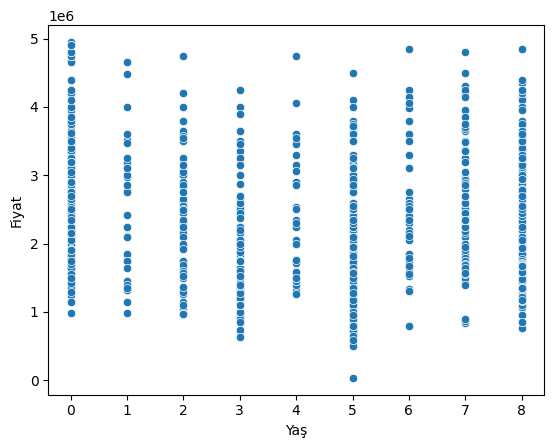

In [55]:
import seaborn as sns
import matplotlib.pyplot as plt
sns.scatterplot(x=veri["Binanın Yaşı"], y=veri["Fiyat"], data=veri)

# eksen etiketleri ekleme
plt.xlabel("Yaş")
plt.ylabel("Fiyat")

# grafiği gösterme
plt.show()

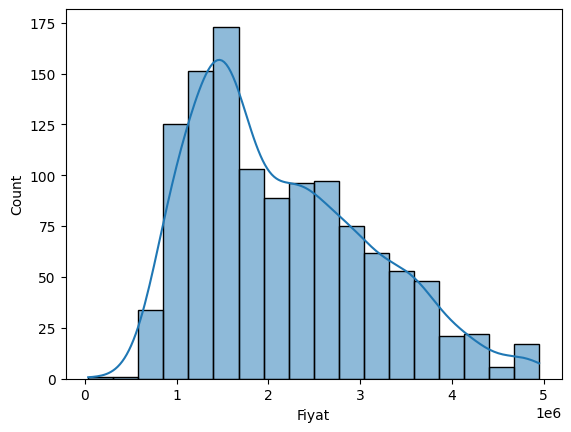

In [57]:
# histogram oluşturma
sns.histplot(veri["Fiyat"], kde=True)

# eksen etiketleri ekleme
plt.xlabel("Fiyat")

# grafiği gösterme
plt.show()

In [58]:
for i in range(len(testX)):
    print("----------------------------------------------------------------------------------------------------")
    print("|",i, ". Test Değeri")
    print("| Lineer Regresyon Tahmini        = ",int(lr_predicted[i]),"TL"," / Aradaki fark = ", int(lr_predicted[i]-testY.iloc[i]),"TL", " / Hata Oranı = ", "%",int((lr_predicted[i]-testY.iloc[i])/testY.iloc[i]*100))
    print("| Random Forest Tahmini           = ",int(rf_predicted[i]),"TL"," / Aradaki fark = ", int(rf_predicted[i]-testY.iloc[i]),"TL", " / Hata Oranı = ", "%",int((rf_predicted[i]-testY.iloc[i])/testY.iloc[i]*100))
    print("| Gradient Boosting Tahmini       = ",int(gb_predicted[i]),"TL"," / Aradaki fark = ", int(gb_predicted[i]-testY.iloc[i]),"TL", " / Hata Oranı = ","%", int((gb_predicted[i]-testY.iloc[i])/testY.iloc[i]*100))
    print("| 3 Algoritmanın Birleşim Tahmini = ",int(clf_predicted[i]),"TL"," / Aradaki fark = ", int(clf_predicted[i]-testY.iloc[i]),"TL", " / Hata Oranı = ","%", int((clf_predicted[i]-testY.iloc[i])/testY.iloc[i]*100))
    print("| Gerçek Sonuç                    = ",testY.iloc[i],"TL")
print("----------------------------------------------------------------------------------------------------")

----------------------------------------------------------------------------------------------------
| 0 . Test Değeri
| Lineer Regresyon Tahmini        =  1229810 TL  / Aradaki fark =  -220189 TL  / Hata Oranı =  % -15
| Random Forest Tahmini           =  1249486 TL  / Aradaki fark =  -200514 TL  / Hata Oranı =  % -13
| Gradient Boosting Tahmini       =  1337789 TL  / Aradaki fark =  -112210 TL  / Hata Oranı =  % -7
| 3 Algoritmanın Birleşim Tahmini =  1269155 TL  / Aradaki fark =  -180844 TL  / Hata Oranı =  % -12
| Gerçek Sonuç                    =  1450000 TL
----------------------------------------------------------------------------------------------------
| 1 . Test Değeri
| Lineer Regresyon Tahmini        =  2779807 TL  / Aradaki fark =  -170192 TL  / Hata Oranı =  % -5
| Random Forest Tahmini           =  2679490 TL  / Aradaki fark =  -270509 TL  / Hata Oranı =  % -9
| Gradient Boosting Tahmini       =  2584640 TL  / Aradaki fark =  -365359 TL  / Hata Oranı =  % -12
| 3 Algori